# Analysis of consecutive strikeouts throughout MLB history

- toc: false
- badges: true
- comments: false
- categories: [sports, data science]
- image: 

## Motivation
On 09/17/2019, Yu Darvish recorded eight consecutive strikeouts for the Chicago Cubs. The game announcers hailed this as an incredible streak, and noted that the all-time MLB record is ten consecutive strikeouts by Tom Seaver in 1970. Given that one of the most significant changes in baseball over the past several decades is the increase in strikeout rate, I was curious to find out how much more likely such an occurrence is today versus, say, 50 years ago. In the end, I find that occurence of K streaks is growing exponentially, and Seaver's feat was roughly 1,164 times less likely than Darvish's.

Let's start by examining some basic trends in MLB pitching data. Using [Baseball Reference](https://www.baseball-reference.com/leagues/MLB/pitch.shtml) we can easily generate league-wide pitching statistics per season. After trimming this data some, we are left with the average number of Strikeouts and Batters Faced, per pitching staff per game, each year since 1900. This implies a 'K rate', or frequency with which any given batter could expect to be mowed down that season.

In [12]:
#collapse-hide
import pandas as pd
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

# begin by populating a dataframe with MLB pitching statistics for every year on record
cols_to_use = ['Year', 'SO', 'BF']
raw_stats = 'C:/Users/tmaul/Documents/GitHub/website/assets/raw_data/mlb_league_stats_by_season.txt'
k_data_by_season = pd.read_table(raw_stats, sep=',', usecols=cols_to_use, index_col='Year').rename(columns={'SO' : 'K'})
# filter out data prior to 1900 -- for roundness, plus the data from those years was fairly unstable
k_data_by_season = k_data_by_season[k_data_by_season.index>=1900]
# calculate strikeout rate for the average pitcher
k_data_by_season['K_rt'] = k_data_by_season.K/k_data_by_season.BF
k_data_by_season

,K,BF,K_rt
Year,,,
2020,8.68,37.03,0.23
2019,8.81,38.39,0.23
2018,8.48,38.08,0.22
2017,8.25,38.13,0.22
2016,8.03,38.01,0.21
...,...,...,...
1904,3.72,36.04,0.10
1903,3.58,36.64,0.10
1902,2.98,36.96,0.08


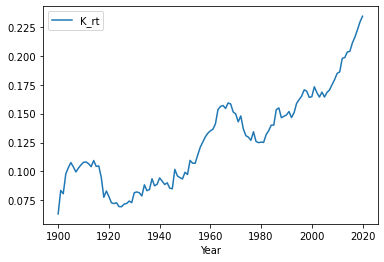

In [10]:
#collapse-hide
k_data_by_season.plot(y='K_rt');

Plotting the 'K rate' above, we can see that strikeouts have become much more common over the last 100 years!